# Module 4 & 5 Praktikum Data Mining
## Classification Tree
* Hartawan Bahari Mulyadi
* Student ID: 182410101113


In [2]:
#@title Initial Import
# Init Library
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

import random as rng

from google.colab import drive
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import sys

sys.path.append('/content/gdrive/MyDrive/Tugas/datmin')
drive.mount('/content/gdrive')

from Darkun7 import pretty_print as ptag

Mounted at /content/gdrive


# Modul

Features Name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset Shape:  (150, 4)
Dataset:       0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
[2]
[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]
|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



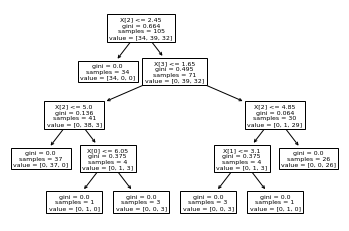

In [3]:
from sklearn.datasets import load_iris

iris_data = load_iris() 
iris=pd.DataFrame(iris_data.data)
print ("Features Name : ", iris_data.feature_names) 
print ("Dataset Shape: ", iris.shape) 
print ("Dataset: ",iris.head())

X = iris.values[:, 0:4] 
Y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

clf= DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)

X=[[6.4,1.8 ,6.6 ,2.1]]
Y_pred=clf.predict(X)
print(Y_pred)
Y_pred=clf.predict(X_test)
print(Y_pred)

tree.plot_tree(clf)

text_representation = tree.export_text(clf)
print(text_representation)

# TUGAS
Ulangilah tahapan klasifikasi menggunakan dataset wine, pima indian diabetes, breast cancer. Hitunglah akurasinya berdasar confusion matrix dengan pesentase data testing 20%, 30%, dan 40%

In [21]:
def dataset_info(data):
  df=pd.DataFrame(data.data)
  print ("Features Name : ", data.feature_names)
  try:
    print ("Class Name : ", data.target_names) 
  except AttributeError:
    print('dataset has no class for label')
  print ("Dataset Shape: ", df.shape) 
  print ("Dataset Sample: ",df.head())
  return df

def calculateD3(data,X,Y, test_size):
  df=pd.DataFrame(data)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 100)
  clf= DecisionTreeClassifier(random_state = 100)
  clf.fit(X_train, y_train)
  ptag.sep(n=64)
  ptag.sep("Decision Tree Using "+str(test_size*100)+"% data testing", 64)
  ptag.sep(n=64)
  
  ptag.br()
  ptag.sep("X Value")
  r = rng.randint(0,df.shape[0])
  X= [df.values[r,:]] #must be aray, why?
  Y_pred=clf.predict(X)
  print(X)

  ptag.br()
  ptag.sep("Predict")  
  print("Class Predict X: ",Y_pred)
  Y_pred=clf.predict(X_test)
  print("Class Predict Test: ",Y_pred)

  ptag.br()
  ptag.sep("Confusion Matrix")
  cm = confusion_matrix(y_test, Y_pred)
  print(cm)

  ptag.br()
  ptag.sep("Accuracy")
  ac = accuracy_score(y_test, Y_pred)
  print(ac)

  plt.figure(figsize=(12,12))
  tree.plot_tree(clf)

# WINE

In [35]:
from sklearn.datasets import load_wine 

wine_data= load_wine() 
wine=dataset_info(wine_data)

X = wine.values[:,:]      # select all record
Y = wine_data.target      # Class

Features Name :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Class Name :  ['class_0' 'class_1' 'class_2']
Dataset Shape:  (178, 13)
Dataset Sample:        0     1     2     3      4     5   ...    7     8     9     10    11      12
0  14.23  1.71  2.43  15.6  127.0  2.80  ...  0.28  2.29  5.64  1.04  3.92  1065.0
1  13.20  1.78  2.14  11.2  100.0  2.65  ...  0.26  1.28  4.38  1.05  3.40  1050.0
2  13.16  2.36  2.67  18.6  101.0  2.80  ...  0.30  2.81  5.68  1.03  3.17  1185.0
3  14.37  1.95  2.50  16.8  113.0  3.85  ...  0.24  2.18  7.80  0.86  3.45  1480.0
4  13.24  2.59  2.87  21.0  118.0  2.80  ...  0.39  1.82  4.32  1.04  2.93   735.0

[5 rows x 13 columns]


============[Decision Tree Using 20.0% datatraining]============

===============[X Value]================
[array([1.358e+01, 2.580e+00, 2.690e+00, 2.450e+01, 1.050e+02, 1.550e+00,
       8.400e-01, 3.900e-01, 1.540e+00, 8.660e+00, 7.400e-01, 1.800e+00,
       7.500e+02])]

===============[Predict]================
Class Predict X:  [2]
Class Predict Test:  [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1]

===========[Confusion Matrix]===========
[[ 8  0  0]
 [ 2 11  2]
 [ 1  3  9]]

===============[Accuracy]===============
0.7777777777777778


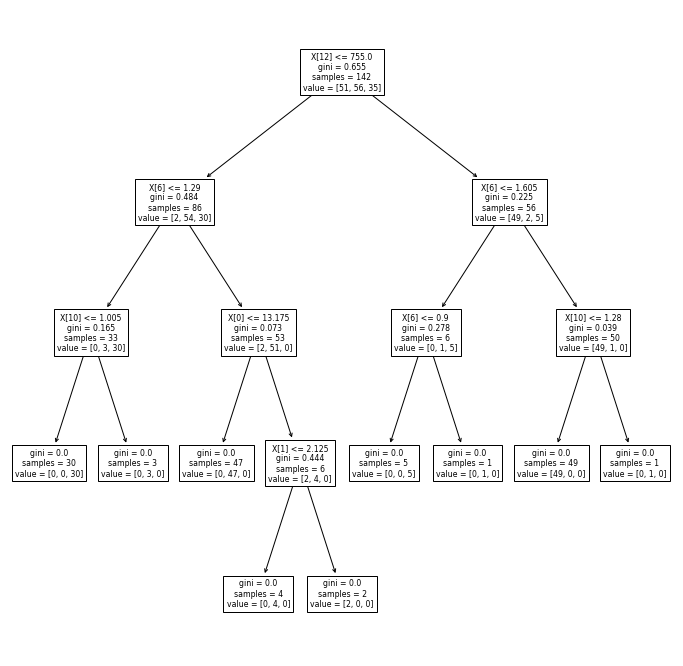

In [36]:
calculateD3(wine,X,Y, 0.2)

============[Decision Tree Using 30.0% datatraining]============

===============[X Value]================
[array([1.146e+01, 3.740e+00, 1.820e+00, 1.950e+01, 1.070e+02, 3.180e+00,
       2.580e+00, 2.400e-01, 3.580e+00, 2.900e+00, 7.500e-01, 2.810e+00,
       5.620e+02])]

===============[Predict]================
Class Predict X:  [1]
Class Predict Test:  [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1 1
 1 2 2 0 1 2 2 0 2 2 2 0 0 0 1 0 1]

===========[Confusion Matrix]===========
[[14  0  0]
 [ 2 15  2]
 [ 1  4 16]]

===============[Accuracy]===============
0.8333333333333334


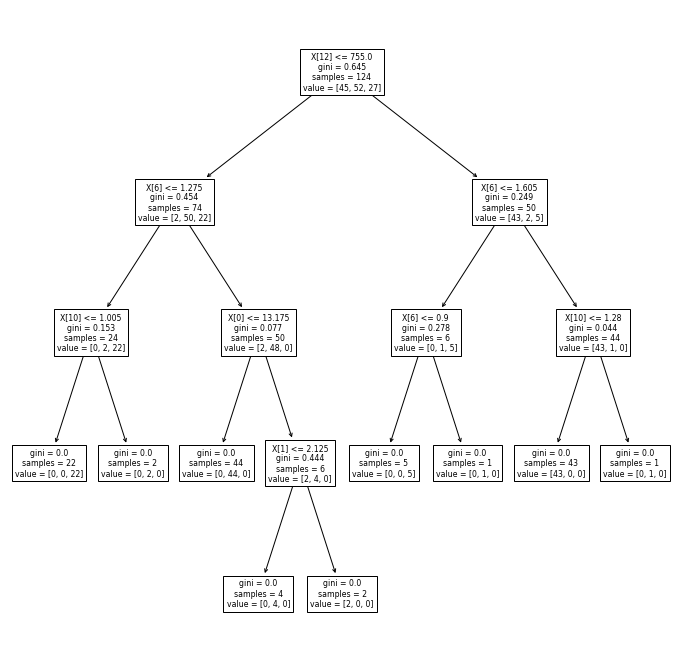

In [37]:
calculateD3(wine,X,Y, 0.3)

============[Decision Tree Using 40.0% datatraining]============

===============[X Value]================
[array([ 12.  ,   1.51,   2.42,  22.  ,  86.  ,   1.45,   1.25,   0.5 ,
         1.63,   3.6 ,   1.05,   2.65, 450.  ])]

===============[Predict]================
Class Predict X:  [1]
Class Predict Test:  [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1 1
 1 2 2 0 1 2 2 0 2 2 2 0 0 0 1 0 1 2 2 0 0 1 1 0 2 0 1 1 2 1 0 0 1 0 0]

===========[Confusion Matrix]===========
[[21  0  0]
 [ 3 21  2]
 [ 1  4 20]]

===============[Accuracy]===============
0.8611111111111112


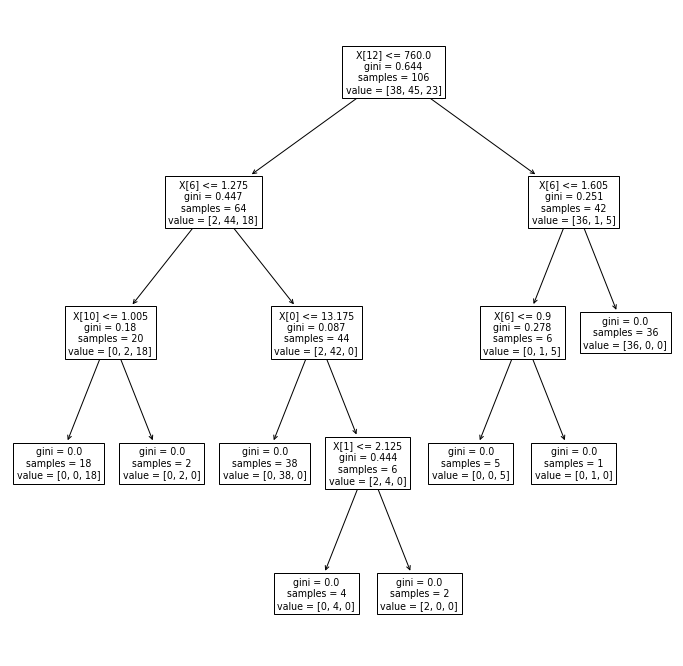

In [7]:
calculateD3(wine,X,Y, 0.4)

# PIMA Indian Diabetes

In [42]:
from sklearn.datasets import load_diabetes

pima_data= load_diabetes() 
pima=dataset_info(pima_data)

X = pima.values[:,:]      # select all record
Y = pima_data.target      # Class

Features Name :  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
dataset has no class for label
Dataset Shape:  (442, 10)
Dataset Sample:            0         1         2  ...         7         8         9
0  0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1 -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2  0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3 -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4  0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641

[5 rows x 10 columns]


============[Decision Tree Using 20.0% datatraining]============

===============[X Value]================
[array([-0.03457486,  0.05068012, -0.00081689,  0.07007254,  0.03970963,
        0.06695249, -0.06549067,  0.1081111 ,  0.02671426,  0.07348023])]

===============[Predict]================
Class Predict X:  [292.]
Class Predict Test:  [ 43. 158. 272. 142. 109.  52. 151. 225. 137. 346. 164.  81. 147. 217.
 219. 206.  61.  65. 232. 181. 297. 197.  50. 132. 166. 135. 151.  77.
 116. 257. 141.  59.  81. 202. 101.  95. 243. 151. 272. 178. 237.  79.
  64. 184.  95. 220. 113. 150. 243.  40. 310.  72.  42.  25. 158. 225.
  88. 281.  72. 151.  63. 237. 127. 310. 293.  71. 167.  84.  65. 107.
 198. 116. 116. 166. 148. 151. 142.  51. 155.  64. 145.  81.  96. 302.
  91. 202. 111.  37.  77.]

===========[Confusion Matrix]===========
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]

===============[Accuracy]===============
0

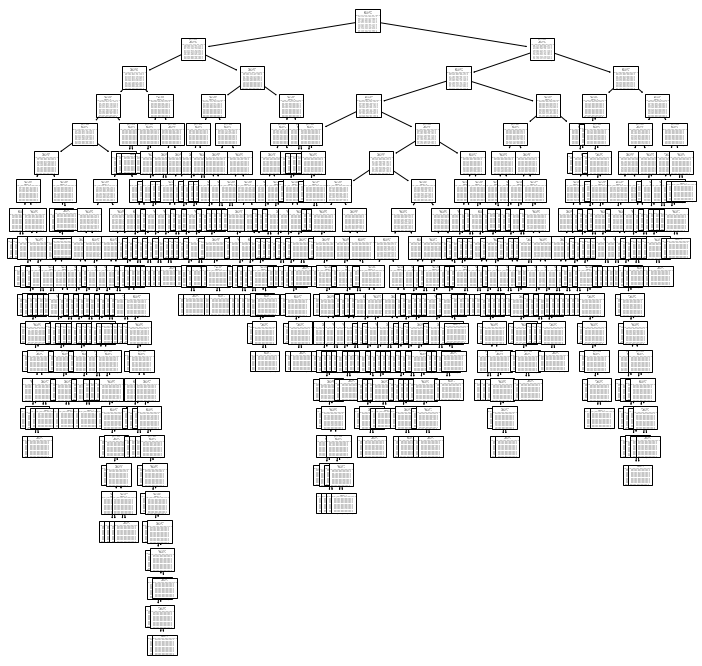

In [43]:
calculateD3(pima,X,Y, 0.2)

In [41]:
calculateD3(pima,X,Y, 0.3)

============[Decision Tree Using 30.0% datatraining]============

===============[X Value]================


ValueError: ignored

============[Decision Tree Using 40.0% datatraining]============

===============[X Value]================
[array([-0.05637009, -0.04464164, -0.01159501, -0.03321358, -0.0469754 ,
       -0.04765985,  0.00446045, -0.03949338, -0.0079794 , -0.08806194])]

===============[Predict]================
Class Predict X:  [151.]
Class Predict Test:  [ 93.  90.  84.  65. 261.  55. 310. 109.  43.  91. 150.  81. 167. 275.
  71. 180.  55.  94. 128.  52. 297. 197. 111. 144. 310.  53. 275.  79.
 142. 107. 265. 129. 140. 214. 220. 196.  84. 170. 272. 110.  60. 174.
  72. 187. 158. 221.  96.  58.  84. 140. 297. 181. 128.  61. 128.  61.
  53. 281.  65.  60. 201.  58. 104. 310. 293.  44. 111.  51.  77.  84.
 150.  71.  72. 142. 200. 180.  71. 158. 200.  77.  90. 140. 160. 170.
  51. 155. 155.  63. 162. 127. 175. 200. 125. 275. 134. 128.  71. 210.
 274.  37. 160. 197.  72.  95. 174. 245. 220. 237. 178.  72. 187. 121.
  72. 128.  59. 151. 151. 102.  55. 170. 197. 258. 190.  84. 297.  51.
  96. 275.  25.  78

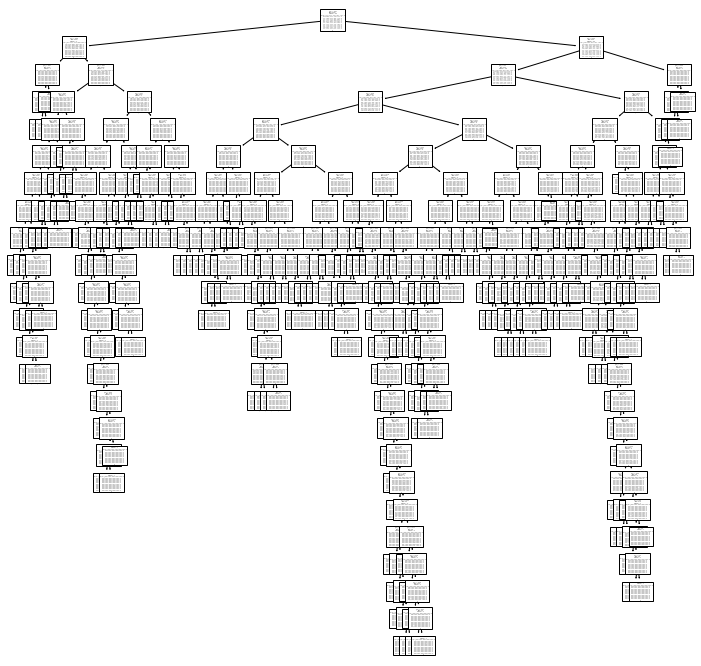

In [29]:
calculateD3(pima,X,Y, 0.4)

# Breast Cancer

In [24]:
from sklearn.datasets import load_breast_cancer

cancer_data= load_breast_cancer() 
cancer=dataset_info(cancer_data)

X = cancer.values[:,:]      # select all record
Y = cancer_data.target      # Class

Features Name :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Class Name :  ['malignant' 'benign']
Dataset Shape:  (569, 30)
Dataset Sample:        0      1       2       3   ...      26      27      28       29
0  17.99  10.38  122.80  1001.0  ...  0.7119  0.2654  0.4601  0.11890
1  20.57  17.77  132.90  1326.0  ...  0.2416  0.1860  0.2750  0.08902
2  19.69  21.25  130.00  1203.0  ...  0.4504  0.2430  0.3613  0.08758
3  11.42  20.38   77.58   386.1  ...  0.6869  0.2575  0.6638  0.1730

============[Decision Tree Using 20.0% datatraining]============

===============[X Value]================
[array([1.289e+01, 1.312e+01, 8.189e+01, 5.159e+02, 6.955e-02, 3.729e-02,
       2.260e-02, 1.171e-02, 1.337e-01, 5.581e-02, 1.532e-01, 4.690e-01,
       1.115e+00, 1.268e+01, 4.731e-03, 1.345e-02, 1.652e-02, 5.905e-03,
       1.619e-02, 2.081e-03, 1.362e+01, 1.554e+01, 8.740e+01, 5.770e+02,
       9.616e-02, 1.147e-01, 1.186e-01, 5.366e-02, 2.309e-01, 6.915e-02])]

===============[Predict]================
Class Predict X:  [1]
Class Predict Test:  [0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 1]

===========[Confusion Matrix]===========
[[45  4]
 [ 2 63]]

===============[Accuracy]===============
0.9473684210526315


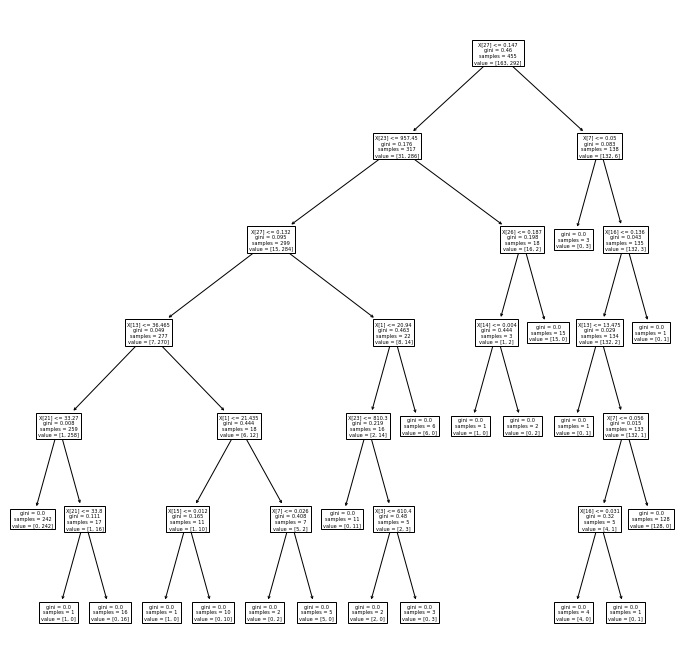

In [25]:
calculateD3(cancer,X,Y, 0.2)

============[Decision Tree Using 30.0% datatraining]============

===============[X Value]================
[array([1.805e+01, 1.615e+01, 1.202e+02, 1.006e+03, 1.065e-01, 2.146e-01,
       1.684e-01, 1.080e-01, 2.152e-01, 6.673e-02, 9.806e-01, 5.505e-01,
       6.311e+00, 1.348e+02, 7.940e-03, 5.839e-02, 4.658e-02, 2.070e-02,
       2.591e-02, 7.054e-03, 2.239e+01, 1.891e+01, 1.501e+02, 1.610e+03,
       1.478e-01, 5.634e-01, 3.786e-01, 2.102e-01, 3.751e-01, 1.108e-01])]

===============[Predict]================
Class Predict X:  [0]
Class Predict Test:  [0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1]

===========[Confusion Matrix]===========
[[64  5]
 [ 3 99]]

===============[Accuracy]=====

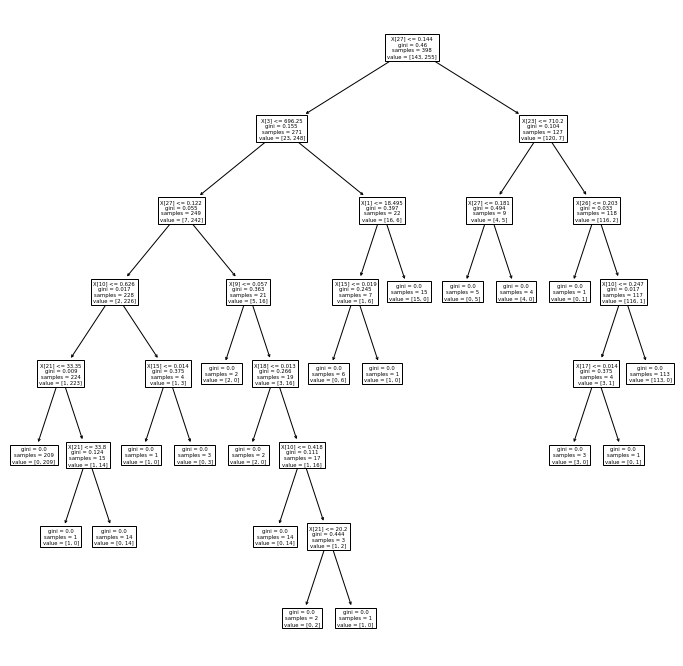

In [13]:
calculateD3(cancer,X,Y, 0.3)

============[Decision Tree Using 40.0% datatraining]============

===============[X Value]================
[array([1.317e+01, 1.822e+01, 8.428e+01, 5.373e+02, 7.466e-02, 5.994e-02,
       4.859e-02, 2.870e-02, 1.454e-01, 5.549e-02, 2.023e-01, 6.850e-01,
       1.236e+00, 1.689e+01, 5.969e-03, 1.493e-02, 1.564e-02, 8.463e-03,
       1.093e-02, 1.672e-03, 1.490e+01, 2.389e+01, 9.510e+01, 6.876e+02,
       1.282e-01, 1.965e-01, 1.876e-01, 1.045e-01, 2.235e-01, 6.925e-02])]

===============[Predict]================
Class Predict X:  [1]
Class Predict Test:  [0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 

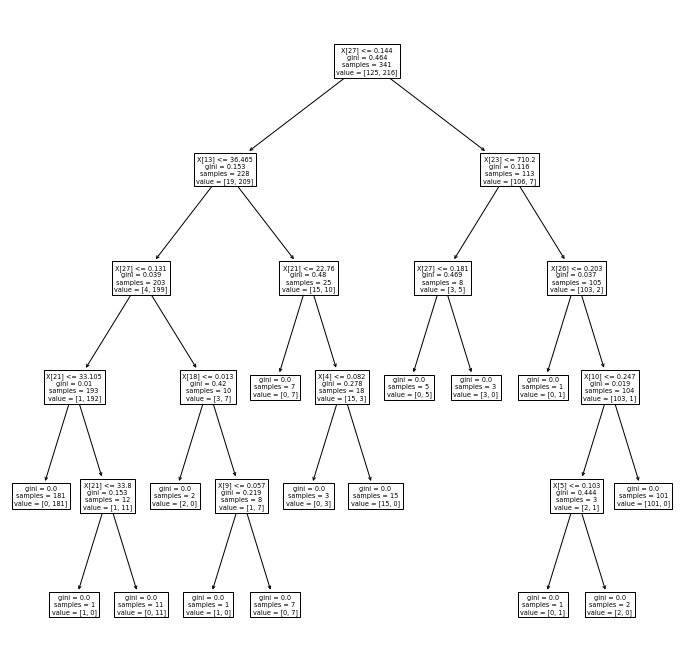

In [14]:
calculateD3(cancer,X,Y, 0.4)